In [54]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import enum
import sys
import bisect
import random
import collections
import os

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn import datasets
from sklearn.cluster import KMeans

from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

from read_data import read_data0, read_data1
from plot_data import getlabels, plot_file , compute_success_rate

In [78]:
numTMatrixUpdates = 15
lastT = numTMatrixUpdates - 1
run2plot = [2, 6, 18]
trans2plot = [0,lastT]
NUM_RUNS = 20
n_primitives = 6  

0.8505564705882351


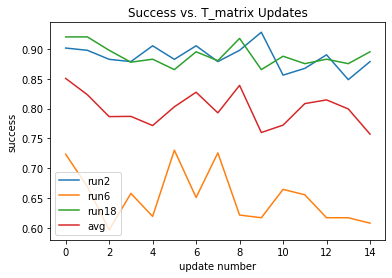

In [79]:
success_a = np.genfromtxt("results/run{0:d}_successRates".format(run2plot[0]),skip_header=1)
success_a = success_a[0:numTMatrixUpdates,1]
success_b = np.genfromtxt("results/run{0:d}_successRates".format(run2plot[1]),skip_header=1)
success_b = success_b[0:numTMatrixUpdates,1]
success_c = np.genfromtxt("results/run{0:d}_successRates".format(run2plot[2]),skip_header=1)
success_c = success_c[0:numTMatrixUpdates,1]
Tupdate = np.arange(0,numTMatrixUpdates,1)

success_sum = np.zeros(numTMatrixUpdates)
success_sum_prev = np.zeros(numTMatrixUpdates)
for i in range(1,NUM_RUNS):
    if i == 11 or i == 16:
        continue
    success = np.genfromtxt("results/run{0:d}_successRates".format(i),skip_header=1)
    success = success[0:numTMatrixUpdates,1]
#     plt.plot(Tupdate, success, label = 'run{0:d}'.format(i))
    success_sum = success_sum + success
success_avg = success_sum/(NUM_RUNS-3)
print(success_avg[0])
     
plt.plot(Tupdate, success_a, label = 'run{0:d}'.format(run2plot[0]))
plt.plot(Tupdate, success_b, label = 'run{0:d}'.format(run2plot[1]))
plt.plot(Tupdate, success_c, label = 'run{0:d}'.format(run2plot[2]))
plt.plot(Tupdate, success_avg, label = 'avg')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('success')
plt.xlabel('update number')
plt.title('Success vs. T_matrix Updates')
plt.legend()
plt.savefig('figures/success_vs_T.png', dpi=600)
plt.show()
plt.close()

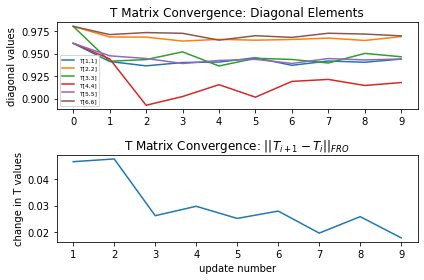

In [77]:
# Plot Transition Matrix values convergence 

#   ------ 1) Diagonal values (legend with 6 numbers)
plt.subplot(211)
# Tdiag: each row has the 6 diagonal elements of one T matrix
# each column is the evolution of an element through the iterations
Tdiag = np.zeros((numTMatrixUpdates, n_primitives)) 
for i in range(numTMatrixUpdates):
    T = np.genfromtxt("transitions/T_{0:d}".format(i))
    Tdiag[i,:] = T.diagonal() # the 6 diagonal elements   
Tupdate = np.arange(0,numTMatrixUpdates,1)

for i in range(n_primitives):
    plt.plot(Tupdate, Tdiag[:,i], label = 'T[{0:d},{1:d}]'.format(i+1,i+1))
ax1 = plt.gca()
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel('update number')
plt.ylabel('diagonal values')
ax1.title.set_text('T Matrix Convergence: Diagonal Elements')
# plt.savefig('figures/T_diag_convergence.png', dpi=600)
plt.legend(loc=3, prop={'size': 6})

#  ------ 2) 2norm of the difference between successive Ts
plt.subplot(212)
# Tdiff: frobenious norm of the difference between consecutive Ts
Tdiff = np.zeros(numTMatrixUpdates-1) 
for i in range(numTMatrixUpdates-1):
    T = np.genfromtxt("transitions/T_{0:d}".format(i))
    Tnext = np.genfromtxt("transitions/T_{0:d}".format(i+1))
    Tdiff[i] = np.sqrt((np.linalg.norm(T-Tnext, 'fro')/36))
Tupdate = np.arange(1,numTMatrixUpdates,1)
plt.plot(Tupdate, Tdiff)
ax2 = plt.gca()
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('update number')
plt.ylabel('change in T values')
ax2.title.set_text('T Matrix Convergence: $||T_{i+1} - T_i||_{FRO}$')
plt.tight_layout()
plt.savefig('figures/T_convergence2.png', dpi=600)
plt.show()
plt.close()